In [18]:
import pandas as pd
import matplotlib.pyplot as plt

training_data = pd.read_csv(r'dataset/sign_mnist_train.csv')
testing_data = pd.read_csv(r'dataset/sign_mnist_test.csv')
training_data.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202


In [19]:
X_train = training_data.drop(columns='label', axis=1)
Y_train = training_data['label']

X_test = testing_data.drop(columns='label', axis=1)
Y_test = testing_data['label']

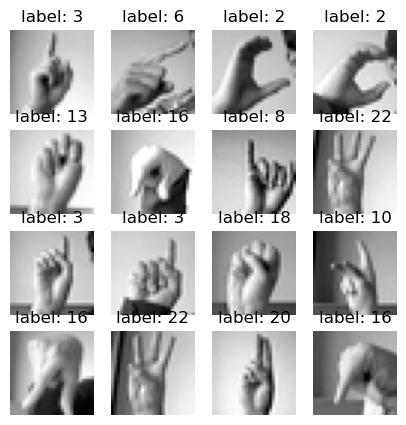

In [51]:
fig, ax = plt.subplots(4,4, figsize = (5,5))
image_index = 0
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(X_train.iloc[image_index,:].to_numpy().reshape(28,28), cmap='gray')
        ax[i,j].axis('off')
        ax[i,j].set_title(f'label: {Y_train[image_index]}')
        image_index += 1

In [121]:
training_data.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
Y_train.value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [66]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((27455, 784), (27455,), (7172, 784), (7172,))

In [10]:
max(X_train.iloc[:,:].max()), min(X_train.iloc[:,:].min())

(255, 0)

# Scaling

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [125]:
max(X_train.iloc[:,:].max()), min(X_train.iloc[:,:].min())

(1.0, 0.0)

# PCA

In [21]:
X_train.shape

(27455, 784)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)    # 0.95
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
X_train_pca.shape

(27455, 100)

# Tree without PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [16]:
dt.score(X_train, Y_train)

1.0

In [17]:
y_prediction = dt.predict(X_test)
dt.score(X_test, Y_test)

0.4376742889012828

# Tree with PCA

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_pca, Y_train)

DecisionTreeClassifier()

In [20]:
dt.score(X_train_pca, Y_train)

1.0

In [22]:
y_prediction = dt.predict(X_test_pca)
dt.score(X_test_pca, Y_test)

0.44074177356385946

# Decision Tree with Hyper parameter tunning

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(splitter='best',
                                       criterion='entropy',
                                       max_depth= 300,
                                       random_state=1)
decision_tree.fit(X_train_pca, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=300, random_state=1)

In [104]:
decision_tree.score(X_test_pca, Y_test)

0.4517568321249303

# Decision Tree with Grid search

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(splitter='best',random_state=1)


param_grid = {
    'criterion': ['entropy','gini'],
    'max_depth': [32, 64, 100],
    'min_samples_split': [10, None],
    'max_features':[0.7, 0.9, None],
    'max_leaf_nodes':[40, 60, None],
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, Y_train)


d:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [32, 64, 100],
                         'max_features': [0.7, 0.9, None],
                         'max_leaf_nodes': [40, 60, None],
                         'min_samples_split': [10, None]},
             scoring='accuracy')

In [65]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'criterion': 'entropy', 'max_depth': 32, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 10}
Best score: 0.9617191768348207


In [66]:
best_tree = grid_search.best_estimator_
best_tree.score(X_test_pca, Y_test)

0.4615170105967652

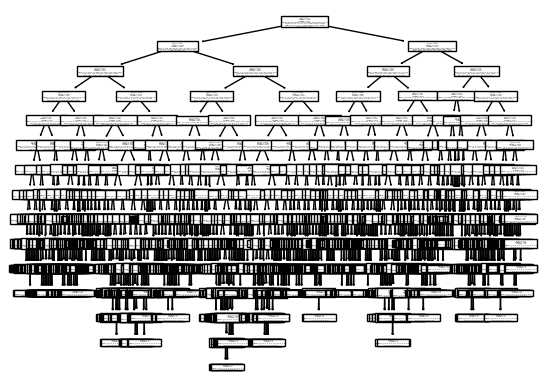

In [67]:
from sklearn.tree import plot_tree

tree_plot_result = plot_tree(best_tree)
plt.show()

# Bagging Classifier

In [69]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier?

Init signature:
BaggingClassifier(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replaceme

## Bagging classifier without hyper parameter tunning

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42, verbose=1)

In [66]:
bagging.fit(X_train_pca, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42,
                  verbose=1)

In [67]:
bagging.score(X_train_pca, Y_train)

0.9999271535239482

In [68]:
bagging.score(X_test_pca, Y_test)

0.5580033463469046

## Bagging with 100 estimators

In [ ]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1, n_jobs=-1, verbose=3, n_estimators=100)

In [32]:
bagging.fit(X_train_pca, Y_train)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  1.1min remaining:  2.3min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  1.2min remaining:   24.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.2min finished


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=1, verbose=3)

In [33]:
bagging.score(X_train_pca, Y_train)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    1.5s remaining:    3.1s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    1.8s finished


1.0

In [34]:
bagging.score(X_test_pca, Y_test)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.4s finished


0.6631344116006692

## Bagging with K-Nearest Neighbours classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_bagging = BaggingClassifier(estimator=KNeighborsClassifier(), random_state=1,n_jobs=-1, n_estimators=100)

In [73]:
knn_bagging.fit(X_train_pca, Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100, n_jobs=-1,
                  random_state=1)

In [74]:
knn_bagging.score(X_train_pca, Y_train)

0.9990894190493534

In [75]:
knn_bagging.score(X_test_pca, Y_test)

0.8177635248187396

# Bagging SVM

In [76]:
from sklearn.svm import SVC

svm_bagging = BaggingClassifier(estimator=SVC(), random_state=1,n_jobs=-1, n_estimators=100)

In [77]:
svm_bagging.fit(X_train_pca, Y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, n_jobs=-1, random_state=1)

In [78]:
svm_bagging.score(X_test_pca, Y_test)

0.855967651979922

# Bagging Grid search

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

base_estimator = DecisionTreeClassifier()

bagging = BaggingClassifier(estimator=base_estimator, random_state=1, bootstrap=False, verbose=1)

param_grid = {
    'n_estimators': [250, 300],
    'max_samples': [0.5, 0.8],
    'estimator__max_depth': [10, 15]
}

grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=5)

In [81]:
grid_search.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=1, verbose=1),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [10, 15],
                         'max_samples': [0.5, 0.8],
                         'n_estimators': [250, 300]},
             scoring='accuracy', verbose=5)

In [82]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)   

Best params: {'estimator__max_depth': 15, 'max_samples': 0.5, 'n_estimators': 250}
Best score: 0.9946457840101985


In [83]:
best_index = grid_search.best_index_
fold_scores = [
    grid_search.cv_results_[f'split{i}_test_score'][best_index]
    for i in range(grid_search.cv)
]
fold_scores

[0.9949007466763795,
 0.9925332362046986,
 0.9945365142961209,
 0.9934438171553451,
 0.9978146057184484]

In [84]:
best_dt_bagging = grid_search.best_estimator_

In [85]:
best_dt_bagging.score(X_test_pca, Y_test)

0.6143335192414947

# XGBoost

In [17]:
sign_language_labels = sorted(Y_train.unique())
for i in sign_language_labels:
    print(i, end=' , ')

0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 

### Re encoding the labels because it causes an error when used with the XGBClassifier, as there is a missing class from the dataset

The class 9 which is equivalent to the "J" is missing from the dataset, and this causes the label values are not continous

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train_transformed = le.fit_transform(Y_train)
le = LabelEncoder()
Y_test_transformed = le.fit_transform(Y_test)

In [22]:
import numpy as np
sign_language_labels = sorted(np.unique(Y_train_transformed))
for i in sign_language_labels:
    print(i, end=' , ')

0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 

In [53]:
xgb_model?

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> estimators=300,
           n_jobs=-1, num_parallel_tree=None, objective='multi:softprob', ...)
File:        d:\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors split

In [ ]:
from xgboost import XGBClassifier

from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=300,   #100
    learning_rate=0.3,  #0.3
    max_depth=6,   #24      
    subsample= 0.5, # 0.6
    eval_metric="mlogloss",  
    n_jobs=-1,                
    random_state=1,
)

In [140]:
result = xgb_model.fit(X_train_pca, Y_train_transformed)

In [141]:
result.score(X_train_pca, Y_train_transformed)

1.0

In [142]:
result.score(X_test_pca, Y_test_transformed)

0.7278304517568321

# XGBoost Grid search

In [11]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    random_state=1,
    n_jobs=-1,                
    eval_metric="mlogloss",
    verbosity=2
)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [150, 300],
    'subsample': [0.6, 0.8],
    'learning_rate': [0.3, 0.1],
    'max_depth':[16, 24],
}

grid_search = GridSearchCV(xgb_model,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [68]:
grid_search.fit(X_train_pca, Y_train_transformed)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=46,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=300,
                                     n_jobs=-1, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.1], 'max_depth': [16, 24],
                         'n_estimators': [150, 300], 'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [72]:
best_xgboost = grid_search.best_estimator_

In [75]:
prediction = best_xgboost.predict(X_test_pca)

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test_transformed, prediction)


0.7313162297824874

In [77]:
print(classification_report(Y_test_transformed, prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       331
           1       0.99      0.82      0.90       432
           2       0.96      0.98      0.97       310
           3       0.74      0.79      0.77       245
           4       0.80      0.94      0.86       498
           5       0.74      0.87      0.80       247
           6       0.83      0.71      0.76       348
           7       0.94      0.87      0.90       436
           8       0.70      0.81      0.75       288
           9       0.63      0.73      0.68       331
          10       0.71      0.99      0.83       209
          11       0.78      0.61      0.69       394
          12       0.47      0.29      0.36       291
          13       0.85      0.74      0.79       246
          14       0.89      0.99      0.94       347
          15       0.77      0.90      0.83       164
          16       0.42      0.63      0.50       144
          17       0.42    

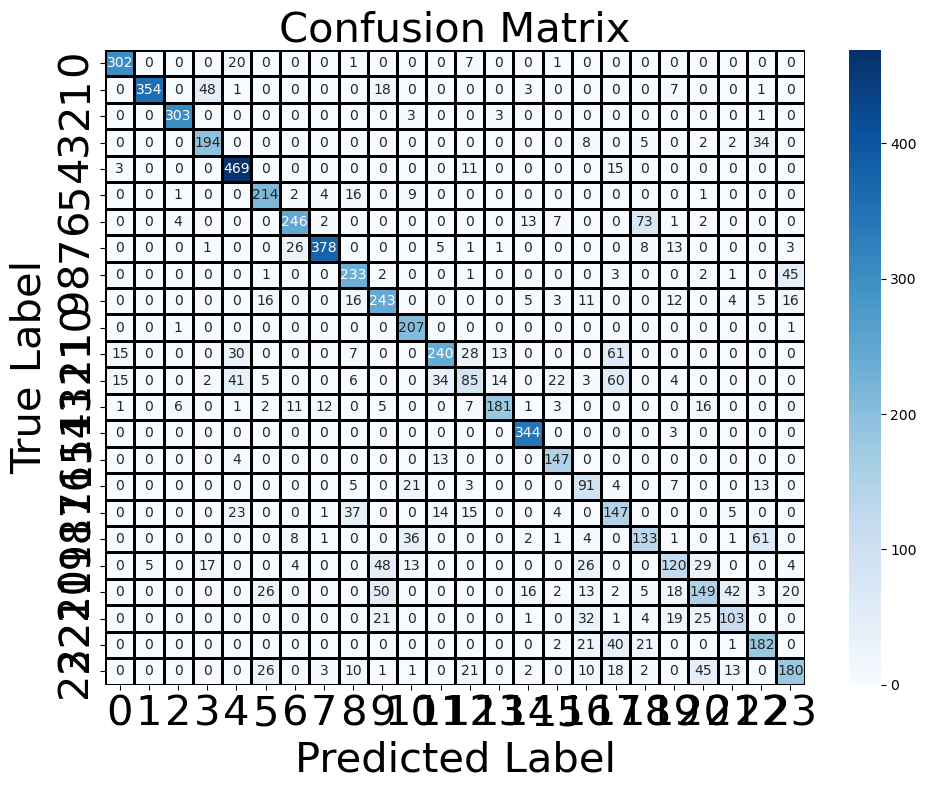

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test_transformed, prediction)

plt.figure(figsize=(10, 8)) 

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=2, linecolor='black',
            annot_kws={"size": 10}) 

plt.title('Confusion Matrix', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.ylabel('True Label', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()


In [23]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    max_depth = 6,
    subsample = 0.5,
    random_state=1,
    n_jobs=-1,                
    eval_metric="mlogloss",
)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [250, 300],
    'learning_rate': [0.3, 0.2],
    'gamma':[0.1, None]
}
grid_search = GridSearchCV(xgb_model,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [24]:
grid_search.fit(X_train_pca, Y_train_transformed)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, None], 'learning_rate': [0.3, 0.2],
                         'n_estimators': [250, 300]},
             scoring='accuracy')

In [25]:
best_xgboost = grid_search.best_estimator_
prediction = best_xgboost.predict(X_test_pca)

In [26]:
best_xgboost.score(X_test_pca, Y_test_transformed)

0.7391243725599553

In [28]:
grid_search.best_params_

{'gamma': None, 'learning_rate': 0.3, 'n_estimators': 250}

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('accuracy score: ',accuracy_score(Y_test_transformed, prediction))

print(classification_report(Y_test_transformed, prediction))

accuracy score:  0.7391243725599553
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       331
           1       1.00      0.85      0.92       432
           2       0.91      0.98      0.94       310
           3       0.85      0.82      0.83       245
           4       0.80      0.91      0.85       498
           5       0.71      0.89      0.79       247
           6       0.82      0.72      0.77       348
           7       0.95      0.91      0.93       436
           8       0.66      0.70      0.68       288
           9       0.72      0.60      0.66       331
          10       0.70      1.00      0.82       209
          11       0.70      0.53      0.60       394
          12       0.53      0.46      0.49       291
          13       0.88      0.65      0.75       246
          14       0.90      0.99      0.94       347
          15       0.77      0.88      0.82       164
          16       0.35      0.68      0.46  

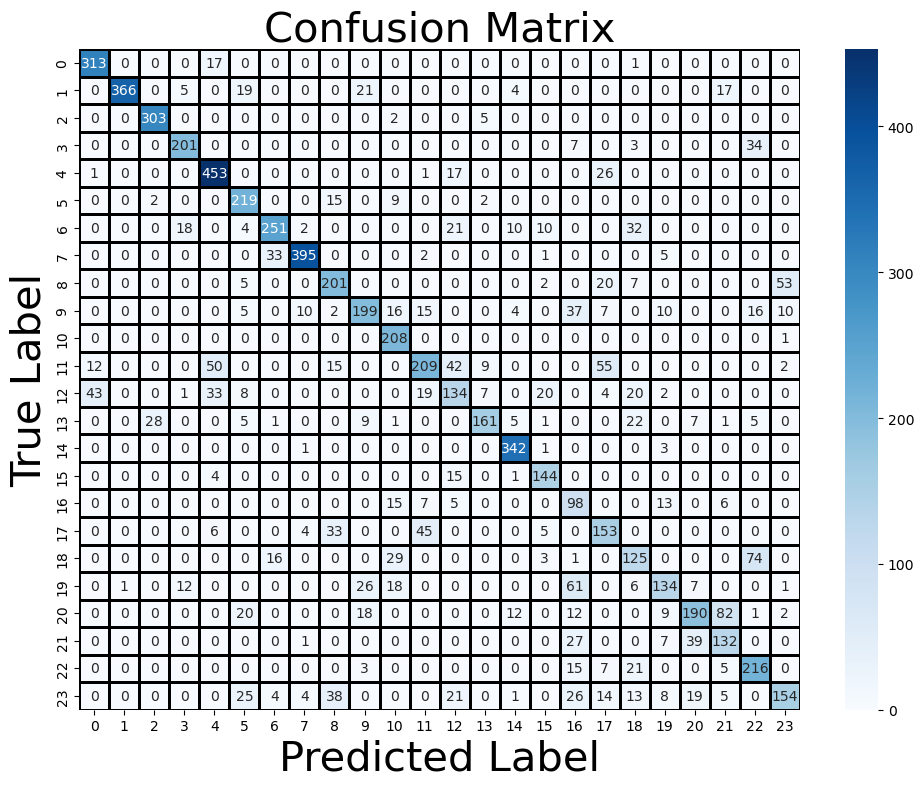

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test_transformed, prediction)

plt.figure(figsize=(10, 8)) 

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=2, linecolor='black',
            annot_kws={"size": 10}) 

plt.title('Confusion Matrix', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.ylabel('True Label', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=1)
rfc.fit(X_train_pca, Y_train)

RandomForestClassifier(n_estimators=300, random_state=1)

In [89]:
rfc.score(X_test_pca, Y_test)

0.804935861684328

# Stacking

In [23]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=1,subsample=0.5, eval_metric="mlogloss", n_jobs=-1)),
    ('svm', SVC(C=10,gamma='scale', kernel='rbf', random_state=1))
]


meta_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=1)


stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1,
    verbose=1
)

In [24]:
stacking_model.fit(X_train_pca, Y_train_transformed)

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(n_jobs=-1,
                                                       random_state=1)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              gro...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=1, ...)),
                               ('svm', SVC(C=10, random_state=1))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      multi_class='multinomial',
                                                      random_state=1),
                   n_jobs=-1, verbose=1)

In [30]:
stacking_model.score(X_train_pca, Y_train_transformed)

1.0

In [31]:
stacking_model.score(X_test_pca, Y_test_transformed)

0.8520635805911879

In [35]:
stacking_probability = stacking_model.predict_proba(X_test_pca)
stacking_predictions = stacking_model.predict(X_test_pca)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy score: ',accuracy_score(Y_test_transformed, prediction))
print(classification_report(Y_test_transformed, prediction))

accuracy score:  0.7391243725599553
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       331
           1       1.00      0.85      0.92       432
           2       0.91      0.98      0.94       310
           3       0.85      0.82      0.83       245
           4       0.80      0.91      0.85       498
           5       0.71      0.89      0.79       247
           6       0.82      0.72      0.77       348
           7       0.95      0.91      0.93       436
           8       0.66      0.70      0.68       288
           9       0.72      0.60      0.66       331
          10       0.70      1.00      0.82       209
          11       0.70      0.53      0.60       394
          12       0.53      0.46      0.49       291
          13       0.88      0.65      0.75       246
          14       0.90      0.99      0.94       347
          15       0.77      0.88      0.82       164
          16       0.35      0.68      0.46  

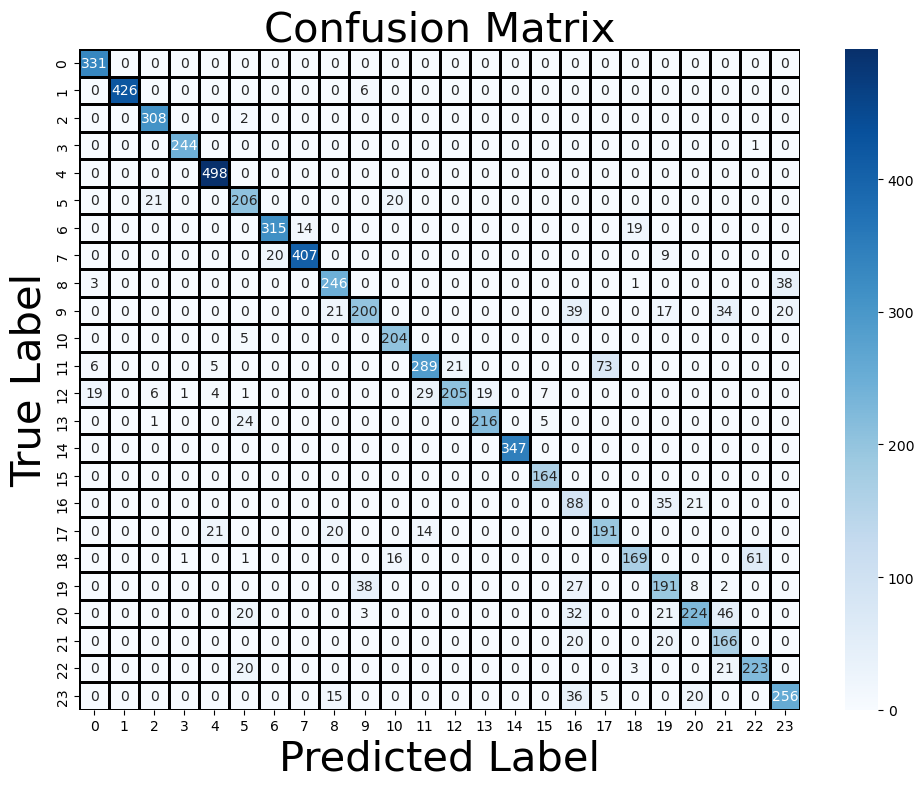

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test_transformed, stacking_predictions)

plt.figure(figsize=(10, 8)) 

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=2, linecolor='black',
            annot_kws={"size": 10}) 

plt.title('Confusion Matrix', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.ylabel('True Label', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [56]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

def plot_roc_curve(prediction_probs , y_test, classes_count):    
    
    auc_ovr = roc_auc_score(y_test, prediction_probs, multi_class='ovr')
    print(f"AUC (OvR): {auc_ovr:.3f}")
    
    # Plot ROC curves for each class
    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(classes_count):  # Assuming 3 classes
        RocCurveDisplay.from_predictions(
            y_true=(y_test == i).astype(int),
            y_pred=prediction_probs[:, i],
            name=f"Class {i} vs Rest",
            ax=ax
        )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Multiclass ROC Curves')
    plt.legend()
    plt.show()

In [62]:
(np.unique(Y_test_transformed).shape)[0]

24

AUC (OvR): 0.988


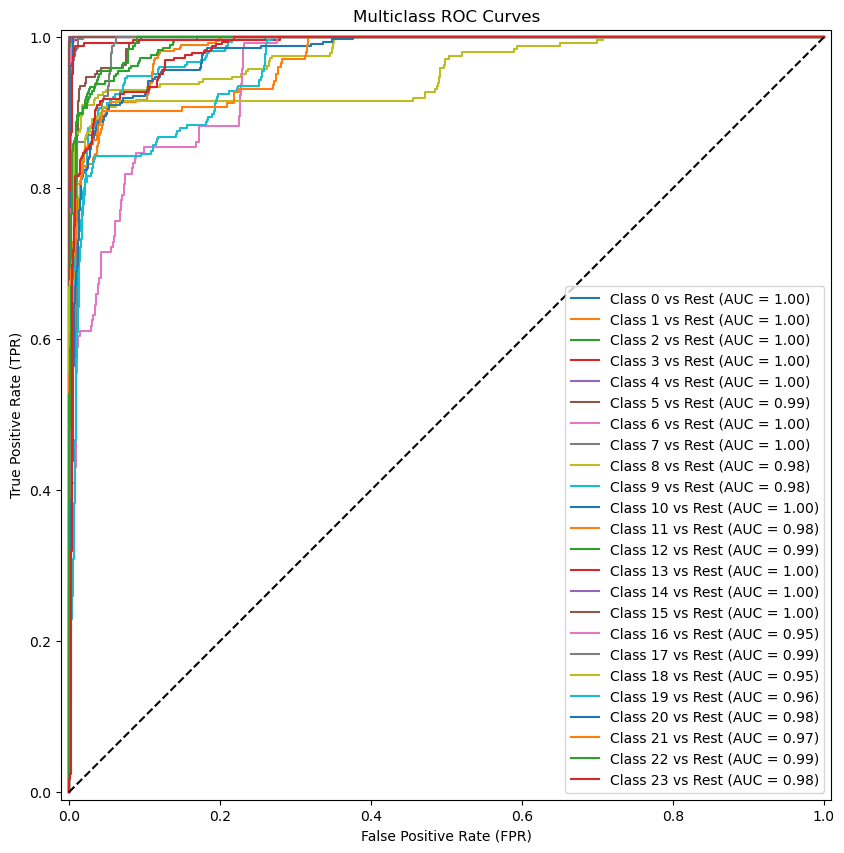

In [63]:
plot_roc_curve(stacking_probability , Y_test_transformed, np.unique(Y_test_transformed).shape[0])

In [90]:
accuracies = {
    'DT Bagging': best_dt_bagging.score(X_test_pca, Y_test),
    'DT XGBoosting': best_xgboost.score(X_test_pca, Y_test_transformed),
    'Knn Bagging': knn_bagging.score(X_test_pca, Y_test),
    'Svm Bagging': svm_bagging.score(X_test_pca, Y_test),
    'Random Forest': rfc.score(X_test_pca, Y_test),
    'Stacking': stacking_model.score(X_test_pca, Y_test_transformed)
}

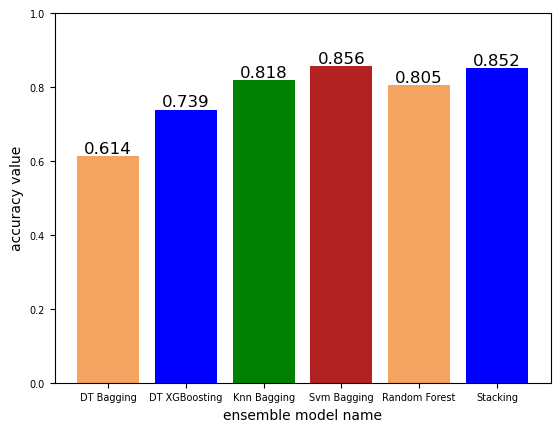

In [118]:
colors = ['sandybrown', 'blue', 'green', 'firebrick']
plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("ensemble model name")
plt.ylabel("accuracy value")
plt.ylim(0,1)

for key,val in accuracies.items():
    plt.text(key, val, f"{val:.3f}", 
             ha='center', va='bottom', fontsize=12)

## creating (label-index to character) dictionary

In [64]:
import string

letters = string.ascii_lowercase

letters_list = [letter for letter in letters if letter != 'j']

In [ ]:
letters_list = letters_list[:-1]    #removing 'z'
letters_dict = {key:letter for key,letter in enumerate(letters_list)}

for item in letters_dict.items():
    print(item, end=' ')

(0, 'a') (1, 'b') (2, 'c') (3, 'd') (4, 'e') (5, 'f') (6, 'g') (7, 'h') (8, 'i') (9, 'k') (10, 'l') (11, 'm') (12, 'n') (13, 'o') (14, 'p') (15, 'q') (16, 'r') (17, 's') (18, 't') (19, 'u') (20, 'v') (21, 'w') (22, 'x') (23, 'y') 

# Prediction sample using the Stacking model

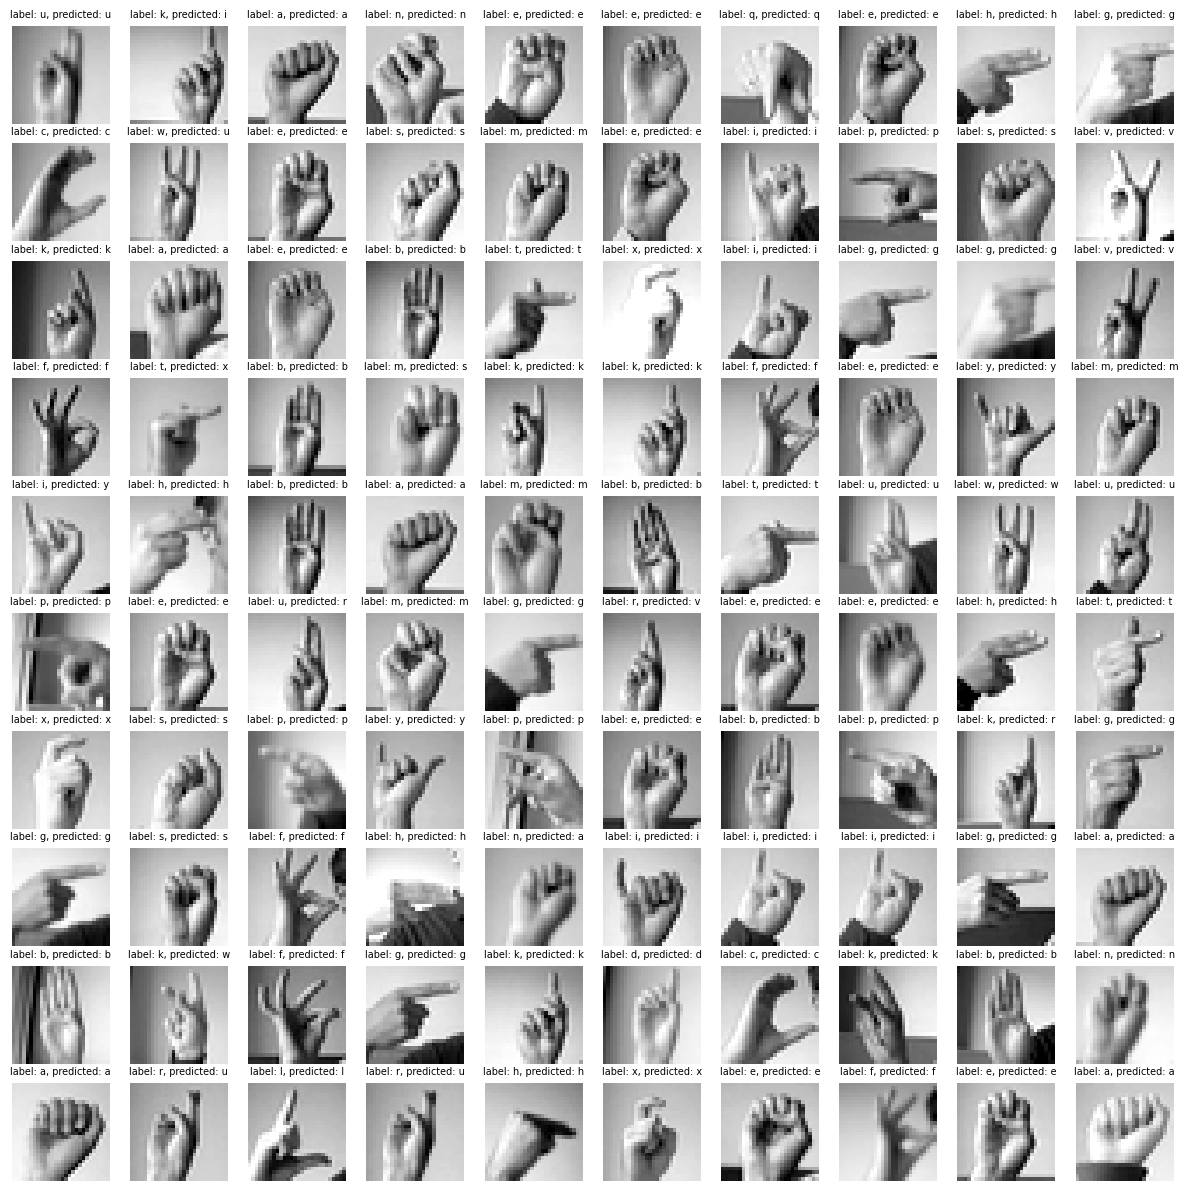

In [66]:
import numpy as np

samples_size = 10

fig, ax = plt.subplots(samples_size,samples_size, figsize = (15,15))
# image_index = 0
for i in range(samples_size):
    for j in range(samples_size):
        sample_index = np.random.randint(0,X_test_pca.shape[0])
        sample_prediction = stacking_model.predict(X_test_pca[sample_index, :].reshape(1,-1))
        sample_prediction_character = letters_dict[sample_prediction[0]]
        actual_sample_character = letters_dict[Y_test_transformed[sample_index]]
        ax[i,j].imshow(X_test.iloc[sample_index,:].to_numpy().reshape(28,28), cmap='gray')
        ax[i,j].axis('off')
        ax[i,j].set_title(f'label: {actual_sample_character}, predicted: {sample_prediction_character}', fontsize=7)
        # image_index += 1